![example 6.2](assets/6.2_example_6.2.png)

### Example 7.1: n-step TD Methods on the Random Walk

Consider using n-step TD methods on the 5-state random walk task described in Example 6.2 (page 125). Suppose the first episode progressed directly from the center state, C, to the right, through D and E, and then terminated on the right with a return of 1. Recall that the estimated values of all the states started at an intermediate value, V(s)=0.5. As a result of this experience, a one-step method would change only the estimate for the last state, V(E), which would be incremented toward 1, the observed return. A two-step method, on the other hand, would increment the values of the two states preceding termination: V(D) and V(E) both would be incremented toward 1. A three-step method, or any n-step method for n > 2, would increment the values of all three of the visited states toward 1, all by the same amount.

Which value of n is better? Figure 7.2 shows the results of a simple empirical test for a larger random walk process, with 19 states instead of 5 (and with a 1 outcome on the left, all values initialized to 0), which we use as a running example in this chapter. Results are shown for n-step TD methods with a range of values for n and α. The performance measure for each parameter setting, shown on the vertical axis, is the square-root of the average squared error between the predictions at the end of the episode for the 19 states and their true values, then averaged over the first 10 episodes and 100 repetitions of the whole experiment (the same sets of walks were used for all parameter settings). Note that methods with an intermediate value of n worked best. This illustrates how the generalization of TD and Monte Carlo methods to n-step methods can potentially perform better than either of the two extreme methods.

![example 7.1](assets/7.1_example_7.1.png)

In [3]:
import random

state_list = ['left_terminal'] + list(range(1, 20)) + ['right_terminal']
terminal_states = ['left_terminal', 'right_terminal']

TRUE_STATE_VALUES = {
    'left_terminal': 0,
    1: -9/10,
    2: -8/10,
    3: -7/10,
    4: -6/10,
    5: -5/10,
    6: -4/10,
    7: -3/10,
    8: -2/10,
    9: -1/10,
    10: 0,
    11: 1/10,
    12: 2/10,
    13: 3/10,
    14: 4/10,
    15: 5/10,
    16: 6/10,
    17: 7/10,
    18: 8/10,
    19: 9/10,
    'right_terminal': 0,
}

INITIAL_STATE = 10

def get_next_state(state, action):
    if action == 'left':
        return state_list[state - 1]
    else:
        return state_list[state + 1]

def get_action():
    if random.random() < 0.5:
        return 'right'
    else:
        return 'left'
    
def get_reward(state, action):
    if state == 19 and action == 'right':
        return 1
    elif state == 1 and action == 'left':
        return -1
    else:
        return 0

def generate_episode():
    episode = []
    state = INITIAL_STATE
    while state not in terminal_states:
        action = get_action()
        next_state = get_next_state(state, action)
        reward = get_reward(state, action)
        episode.append((state, reward))
        state = next_state
    return episode

episode = generate_episode()
print(len(episode))

import numpy as np

def calculate_rms_error(state_values, true_state_values):
    rms_error = 0
    # Only calculate RMS over non-terminal states (1-19)
    non_terminal_states = [i for i in range(1, 20)]
    for state in non_terminal_states:
        rms_error += (true_state_values[state] - state_values[state]) ** 2
    rms_error = rms_error / len(non_terminal_states)  # Divide by 19, not 21
    rms_error = rms_error ** 0.5
    return rms_error

def run_learning_td_n_step(alpha, n=1, runs=100, episodes=10):
    rms_errors_over_runs = []
    for _ in range(runs):
        state_values = {i: 0 for i in range(1, 20)}
        state_values['left_terminal'] = 0
        state_values['right_terminal'] = 0

        rms_errors = []

        for _ in range(episodes):

            # implement n-step td here
            state = INITIAL_STATE
            T = float('inf')
            t = 0
            episode = [(state, 0)]
            while True:
                if t < T:
                    action = get_action()
                    reward = get_reward(state, action)
                    next_state = get_next_state(state, action)
                    state = next_state
                    episode.append((state, reward))
                    if next_state in terminal_states:
                        T = t + 1
                tau = t - n + 1
                if tau >= 0:
                    G = 0
                    for i in range(tau + 1, min(tau + n + 1, T + 1)):
                            G += episode[i][1]
                    if tau + n < T:
                        G += state_values[episode[tau + n][0]]
                    state_values[episode[tau][0]] += alpha * (G - state_values[episode[tau][0]])
                t += 1
                if tau >= T - 1:
                    break
            
            rms_errors.append(calculate_rms_error(state_values, TRUE_STATE_VALUES))
        average_rms_errors = np.mean(rms_errors)
        rms_errors_over_runs.append(average_rms_errors)

    average_rms_error = np.mean(rms_errors_over_runs)

    return average_rms_error

118


Generating data for graph...
Processing n=1
  Alpha=0.05
  Alpha=0.10
  Alpha=0.15
  Alpha=0.20
  Alpha=0.25
  Alpha=0.30
  Alpha=0.35
  Alpha=0.40
  Alpha=0.45
  Alpha=0.50
  Alpha=0.55
  Alpha=0.60
  Alpha=0.65
  Alpha=0.70
  Alpha=0.75
  Alpha=0.80
  Alpha=0.85
  Alpha=0.90
  Alpha=0.95
  Alpha=1.00
Processing n=2
  Alpha=0.05
  Alpha=0.10
  Alpha=0.15
  Alpha=0.20
  Alpha=0.25
  Alpha=0.30
  Alpha=0.35
  Alpha=0.40
  Alpha=0.45
  Alpha=0.50
  Alpha=0.55
  Alpha=0.60
  Alpha=0.65
  Alpha=0.70
  Alpha=0.75
  Alpha=0.80
  Alpha=0.85
  Alpha=0.90
  Alpha=0.95
  Alpha=1.00
Processing n=4
  Alpha=0.05
  Alpha=0.10
  Alpha=0.15
  Alpha=0.20
  Alpha=0.25
  Alpha=0.30
  Alpha=0.35
  Alpha=0.40
  Alpha=0.45
  Alpha=0.50
  Alpha=0.55
  Alpha=0.60
  Alpha=0.65
  Alpha=0.70
  Alpha=0.75
  Alpha=0.80
  Alpha=0.85
  Alpha=0.90
  Alpha=0.95
  Alpha=1.00
Processing n=8
  Alpha=0.05
  Alpha=0.10
  Alpha=0.15
  Alpha=0.20
  Alpha=0.25
  Alpha=0.30
  Alpha=0.35
  Alpha=0.40
  Alpha=0.45
  Alpha=0.50
 

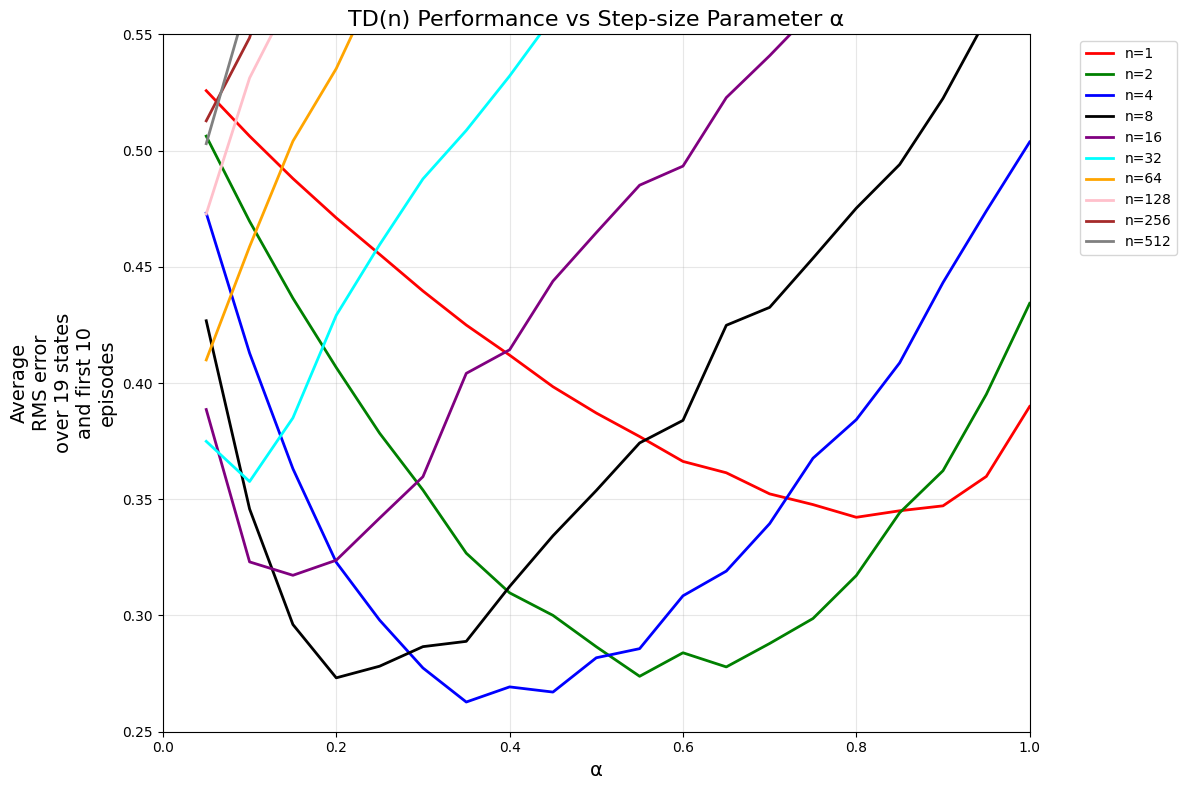

Test RMS error (alpha=0.4, n=4): 0.26487547280399926


In [4]:
import matplotlib.pyplot as plt

def generate_graph_data():
    alpha_values = np.arange(0.05, 1.05, 0.05)  # Start from 0.05 to avoid alpha=0
    n_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
    
    results = {}
    
    print("Generating data for graph...")
    for n in n_values:
        print(f"Processing n={n}")
        rms_errors = []
        for alpha in alpha_values:
            print(f"  Alpha={alpha:.2f}")
            rms_error = run_learning_td_n_step(alpha=alpha, n=n, runs=100, episodes=10)
            rms_errors.append(rms_error)
        results[n] = rms_errors
    
    return alpha_values, results

def plot_graph(alpha_values, results):
    plt.figure(figsize=(12, 8))
    
    colors = ['red', 'green', 'blue', 'black', 'purple', 'cyan', 'orange', 'pink', 'brown', 'gray']
    
    for i, n in enumerate([1, 2, 4, 8, 16, 32, 64, 128, 256, 512]):
        plt.plot(alpha_values, results[n], label=f'n={n}', color=colors[i], linewidth=2)
    
    plt.xlabel('α', fontsize=14)
    plt.ylabel('Average\nRMS error\nover 19 states\nand first 10\nepisodes', fontsize=14)
    plt.title('TD(n) Performance vs Step-size Parameter α', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(0, 1)
    plt.ylim(0.25, 0.55)
    plt.tight_layout()
    plt.show()

# Generate and plot the data
alpha_values, results = generate_graph_data()
plot_graph(alpha_values, results)

rms_error = run_learning_td_n_step(alpha=.4, n=4)
print(f"Test RMS error (alpha=0.4, n=4): {rms_error}")